# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print(X_train.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')


(60000, 28, 28)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


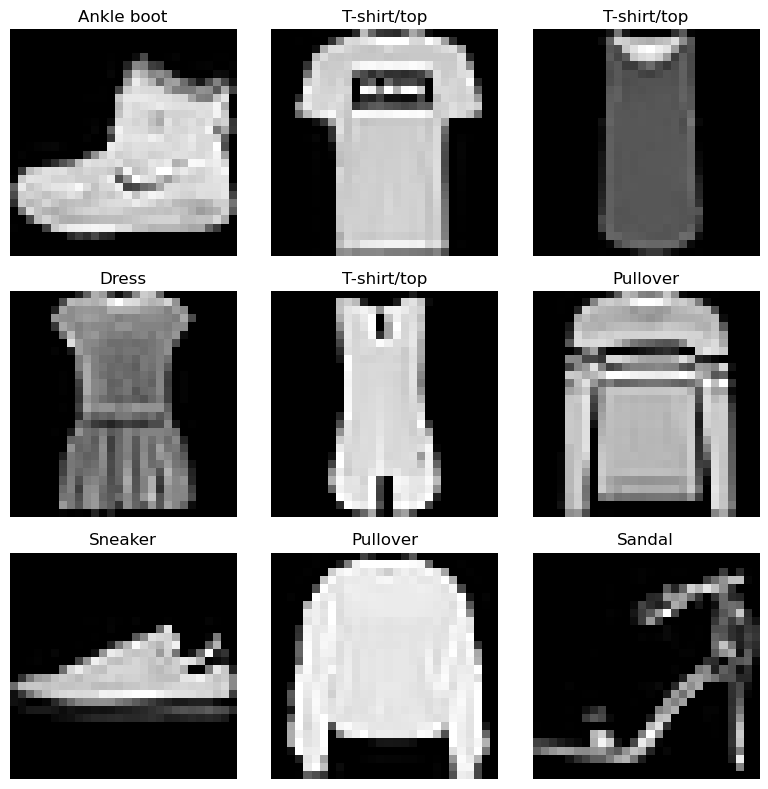

In [3]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
import numpy as np
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    class_id = int(np.argmax(y_train[i]))   # works if y_train is one-hot
    plt.title(class_names[class_id])
    plt.axis('off')

plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))           # from 28x28 to 784
model.add(Dense(10))         # 10 classes

# Compile the model using `model.compile()`
model.compile(
    optimizer= SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy'] 
)
# Train the model with `model.fit()`
history = model.fit(
    X_train, y_train,            # y_train should be one-hot for the chosen loss above
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
    )
# Evaluate the model with `model.evaluate()`
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Epoch 1/10


/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.1028 - loss: 3.6937 - val_accuracy: 0.1008 - val_loss: 3.1008
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.1026 - loss: 3.7028 - val_accuracy: 0.1012 - val_loss: 13.5813
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0996 - loss: 11.7265 - val_accuracy: 0.1008 - val_loss: 10.1698
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.1013 - loss: 10.2681 - val_accuracy: 0.1008 - val_loss: 8.7761
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.0996 - loss: 10.1114 - val_accuracy: 0.1008 - val_loss: 9.0158
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.1010 - loss: 8.9724 - val_accuracy: 0.1008 - val_loss: 8.9593
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.0996 - loss: 8.9302 - val_accuracy: 0.1008 - val_loss: 9.2494
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.1018 - loss: 9.3401 - val_ac

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),                 # light regularization
    Dense(10, activation='softmax')
])

# Compile
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',          # or 'sparse_categorical_crossentropy'
              metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train, y_train,              # y_train should be one-hot for the chosen loss above
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


# Evaluate the model

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Epoch 1/10


/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5495 - loss: 1.2400 - val_accuracy: 0.7965 - val_loss: 0.5212
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7947 - loss: 0.5458 - val_accuracy: 0.8242 - val_loss: 0.4573
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8220 - loss: 0.4787 - val_accuracy: 0.8440 - val_loss: 0.4128
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8435 - loss: 0.4291 - val_accuracy: 0.8485 - val_loss: 0.4043
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8508 - loss: 0.4005 - val_accuracy: 0.8685 - val_loss: 0.3536
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8642 - loss: 0.3761 - val_accuracy: 0.8713 - val_loss: 0.3414
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8678 - loss: 0.3560 - val_accuracy: 0.8793 - val_loss: 0.3293
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8728 - loss: 0.3426 - val_accuracy: 0.877

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

In [6]:
# Yes there was an improvement. Convolutions learn local patterns and build them into higher level shapes across layers

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [7]:
# A. Test Hyperparameters
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Create a loop that tests the following permutations:
# Regularization technique -  Model with and without a dropout layer of 0.3
# Hyperparameter options - Modes with 32, 64, 128 filters 
# this will give us 6 model options to compare and choose from for question 5

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define hyperparameter & regularization options
filter_sizes = [32, 64, 128]
dropout_layer = [False, True]
results = []

# Create for loop
for filters in filter_sizes:
    for dropout in dropout_layer:
        model_test = Sequential()
        model_test.add(Conv2D(filters, kernel_size=(3,3), activation='relu', input_shape = (28, 28, 1)))
        model_test.add(Flatten())

        if dropout:
            model_test.add(Dropout(0.3))
        
        model_test.add(Dense(10, activation='softmax'))

        # Compile the model
        model_test.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.01),
        metrics=['accuracy']
        )
        
        # Train the model with `model.fit()`
        history = model_test.fit(
        X_train, 
        y_train,
        epochs=10, 
        batch_size=32,
        validation_split=0.2
        )

        test_loss, test_accuracy = model_test.evaluate(X_test, y_test, verbose=0)

        results.append({
            'filters': filters,
            'dropout': dropout,
            'test_loss': f"{test_loss:.2f}",
            'test_accuracy (%)':f"{test_accuracy * 100:.2f}"
        })

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8180 - loss: 0.5534 - val_accuracy: 0.8553 - val_loss: 0.4007
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8831 - loss: 0.3210 - val_accuracy: 0.8791 - val_loss: 0.3497
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8954 - loss: 0.2894 - val_accuracy: 0.8768 - val_loss: 0.3719
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9100 - loss: 0.2504 - val_accuracy: 0.8763 - val_loss: 0.3644
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9144 - loss: 0.2310 - val_accuracy: 0.8451 - val_loss: 0.4703
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9207 - loss: 0.2190 - val_accuracy: 0.8796 - val_loss: 0.3978
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9279 - loss: 0.1932 - val_accuracy: 0.8577 - val_loss: 0.4679
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9294 - loss: 0.1925 - 

In [8]:
# B. Test presence or absence of regularization

import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


   filters  dropout test_loss test_accuracy (%)
0       32    False      0.56             85.23
1       32     True      0.43             86.86
2       64    False      0.62             86.56
3       64     True      0.43             87.25
4      128    False      0.68             86.12
5      128     True      0.43             86.32


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

In [9]:
# the results are showing us that with 128 filters and having a drop out layer of 0.3 is giving us the best performance in terms of accuracy and minimal loss. Having the 
# drop out layers addresses issues such as overfitting which is most likely the reason behind the better performance

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [10]:
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create the final  CNN model with increased filter count, greater kernel size and dropout of 0.2
model_final = Sequential()
model_final.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_final.add(Flatten())
model_final.add(Dropout(0.3))
#model_final.add(Dense(128, activation='relu'))  
model_final.add(Dense(10, activation='softmax'))  


# Compile the model
model_final.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Train the model with `model.fit()`
history_final = model_final.fit(
    X_train, 
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10


/Applications/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8078 - loss: 0.5875 - val_accuracy: 0.8727 - val_loss: 0.3636
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8718 - loss: 0.3580 - val_accuracy: 0.8731 - val_loss: 0.3532
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8848 - loss: 0.3258 - val_accuracy: 0.8768 - val_loss: 0.3504
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8874 - loss: 0.3098 - val_accuracy: 0.8688 - val_loss: 0.3733
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8882 - loss: 0.3070 - val_accuracy: 0.8793 - val_loss: 0.3554
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8897 - loss: 0.2973 - val_accuracy: 0.8698 - val_loss: 0.3720
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8952 - loss: 0.2867 - val_accuracy: 0.8771 - val_loss: 0.3600
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8961 - loss: 0.28

In [11]:
final_loss, final_accuracy = model_final.evaluate(X_test, y_test)

print(f'Loss:     {final_loss:.2f}')
print(f'Accuracy: {final_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8776 - loss: 0.3894
Loss:     0.38
Accuracy: 87.53%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

Below are the results compared to the baseline mode we ran in question 2 (model_baseline) and the original CNN model we ran in question 3 (model):

Baseline Model (model_baseline)

Test loss: 0.4613 | Test accuracy: 0.8384

Original CNN (model)

Test loss: 0.3238 | Test accuracy: 0.8828

Final Model

Loss:     0.41
Accuracy: 87.45%

There was a material improvement from the baseline when compared with the original CNN model that I ran. Significantly lower loss and a higher accuracy score. This was most likely due to the fact that convolutions learn local patterns and build them into higher level shapes across layers.

From the original CNN model to the final model there was in fact a negligible drop in performance. This was most likely due to replacing SGD with Adam. 

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.